In [14]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
import random

def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

def distance(p1, p2):
    dist = np.sqrt(np.sum(np.power(p2 - p1, 2)))
    return dist


def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)


def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]


def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])


def make_prediction_grid(predictors, outcomes, limits, h, k):
    (x_min, x_max, y_min, y_max) = limits 
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
            
    return (xx, yy, prediction_grid)


def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

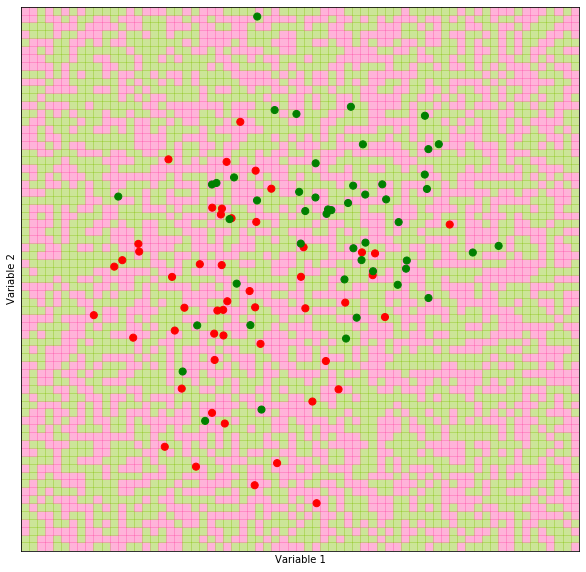

In [18]:
(predictors, outcomes) = generate_synth_data()
k=50; filename ="knn1000.png"; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)